In [209]:
import os
import pandas as pd 
import matplotlib.pyplot as plt 
import torch
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np


from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import pandas as pd


In [210]:
labels = pd.read_csv('../dataset/images.csv')
labels.head()

,image,sender_id,label,kids
0,4285fab0-751a-4b74-8e9b-43af05deee22,124,Not sure,False
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,148,T-Shirt,False
2,00627a3f-0477-401c-95eb-92642cbe078d,94,Not sure,False
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,43,T-Shirt,False
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,189,Shoes,False


In [211]:
labels['image'] = labels['image'] + '.jpg'
label_df = labels[['image', 'label']]

In [212]:
label_df.head()

,image,label
0,4285fab0-751a-4b74-8e9b-43af05deee22.jpg,Not sure
1,ea7b6656-3f84-4eb3-9099-23e623fc1018.jpg,T-Shirt
2,00627a3f-0477-401c-95eb-92642cbe078d.jpg,Not sure
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa.jpg,T-Shirt
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0.jpg,Shoes


In [213]:
classes=list(label_df['label'].unique())
classes

['Not sure',
 'T-Shirt',
 'Shoes',
 'Shorts',
 'Shirt',
 'Pants',
 'Skirt',
 'Other',
 'Top',
 'Outwear',
 'Dress',
 'Body',
 'Longsleeve',
 'Undershirt',
 'Hat',
 'Polo',
 'Blouse',
 'Hoodie',
 'Blazer']

In [214]:
repl={}
for i in range(len(classes)):
    repl[classes[i]]=i
    
repl

{'Not sure': 0,
 'T-Shirt': 1,
 'Shoes': 2,
 'Shorts': 3,
 'Shirt': 4,
 'Pants': 5,
 'Skirt': 6,
 'Other': 7,
 'Top': 8,
 'Outwear': 9,
 'Dress': 10,
 'Body': 11,
 'Longsleeve': 12,
 'Undershirt': 13,
 'Hat': 14,
 'Polo': 15,
 'Blouse': 16,
 'Hoodie': 17,
 'Blazer': 18}

In [215]:
label_df.head()

,image,label
0,4285fab0-751a-4b74-8e9b-43af05deee22.jpg,Not sure
1,ea7b6656-3f84-4eb3-9099-23e623fc1018.jpg,T-Shirt
2,00627a3f-0477-401c-95eb-92642cbe078d.jpg,Not sure
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa.jpg,T-Shirt
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0.jpg,Shoes


In [216]:
for i in range(len(label_df)):
    label_df['label'][i]=repl[label_df['label'][i]]

/tmp/ipykernel_4425/2099595697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_df['label'][i]=repl[label_df['label'][i]]
/tmp/ipykernel_4425/2099595697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_df['label'][i]=repl[label_df['label'][i]]
/tmp/ipykernel_4425/2099595697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_df['label'][i]=repl[label_df['label'][i]]
/tmp/ipykernel_4425/2099595697.py:2: SettingWi

In [217]:
label_df.head()

,image,label
0,4285fab0-751a-4b74-8e9b-43af05deee22.jpg,0
1,ea7b6656-3f84-4eb3-9099-23e623fc1018.jpg,1
2,00627a3f-0477-401c-95eb-92642cbe078d.jpg,0
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa.jpg,1
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0.jpg,2


In [218]:
from sklearn.model_selection import train_test_split
train_label_df, test_label_df = train_test_split(label_df, test_size=0.10)

In [219]:
print(len(train_label_df))
print(len(test_label_df))

4851
539


In [220]:
print(type(train_label_df))
print(train_label_df.head())

<class 'pandas.core.frame.DataFrame'>
                                         image label
3078  62510f59-0273-4ec7-bb75-189b17eef548.jpg    15
2165  96f9dce9-29a4-4cab-8d04-c009db5e895e.jpg    12
4474  f1838131-dff5-4b23-8a54-0e6fbc4230ab.jpg    12
3450  6e519c22-3cdf-4dfe-8859-529a20e68748.jpg     9
2987  58917d02-1414-43b7-88ee-ba1cb093cf56.jpg     1


In [221]:
train_label_df.to_csv ('./train_csv3.csv', index = False, header=True)
test_label_df.to_csv ('./test_csv3.csv', index = False, header=True)

In [222]:
from torch.utils.data import Dataset
import pandas as pd
import os
from PIL import Image
import torch

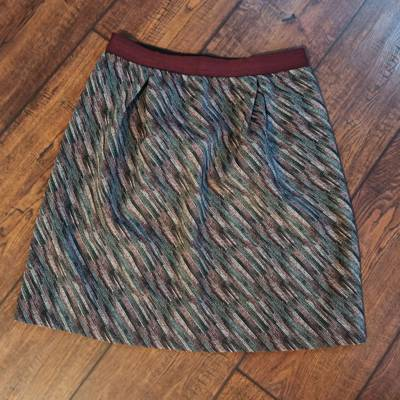

In [223]:
PATH = '../dataset/images'
PATH = os.path.join(PATH, '9e530520-3973-44d0-b630-e213c809b854.jpg')
img  = Image.open(PATH)
img

In [224]:
class DressDataset(Dataset):
    def __init__(self, root_dir, annotation_file, transform=None):
        self.root_dir = root_dir
        self.annotations = pd.read_csv(annotation_file)
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_id = self.annotations.iloc[index, 0]
        img = Image.open(os.path.join(self.root_dir, img_id)).convert("RGB")
        y_label = torch.tensor(float(self.annotations.iloc[index, 1]))

        if self.transform is not None:
            img = self.transform(img)

        return (img, y_label)

In [225]:
transform = transforms.Compose(
    [transforms.Resize((32, 32)),
     transforms.ToTensor(),
     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

batch_size = 16

In [226]:
train_df = pd.read_csv('./train_csv3.csv')

In [227]:
train_df.head()

,image,label
0,62510f59-0273-4ec7-bb75-189b17eef548.jpg,15
1,96f9dce9-29a4-4cab-8d04-c009db5e895e.jpg,12
2,f1838131-dff5-4b23-8a54-0e6fbc4230ab.jpg,12
3,6e519c22-3cdf-4dfe-8859-529a20e68748.jpg,9
4,58917d02-1414-43b7-88ee-ba1cb093cf56.jpg,1


In [228]:
trainset = DressDataset(
    root_dir='../dataset/images',
    annotation_file='./train_csv3.csv',
    transform = transform
    )

In [229]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

In [230]:
testset = DressDataset(root_dir='../dataset/images/', annotation_file='./test_csv3.csv', transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

In [231]:
data_loaders = {'train':trainloader, 'test':testloader} 

In [232]:
model = torchvision.models.vgg16(pretrained=True)

/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [233]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [234]:
import torch.nn as nn
from torch.nn import Flatten, Linear, ReLU, Conv2d,MaxPool2d, AdaptiveAvgPool2d
# The new Added convolution layer
Added_Layers = torch.nn.modules.Sequential(Conv2d(in_channels=512,
                                                 out_channels=512,
                                                    kernel_size=3,
                                                        padding=1,
                                                         stride=1),
                                    ReLU(),
                                    AdaptiveAvgPool2d(output_size=(7, 7))
                                    )
# Freeze all layers
for param in model.parameters():
    param.requires_grad = False




# Parameters of newly constructed modules have requires_grad=True by default
# Replace the last layers
model.avgpool =Added_Layers
model.classifier = nn.Linear(25088, 20)  
# Optimize only the parameters of ''classifier', and 'avgpool'
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
#model.classifier.parameters()

In [235]:
for name, param in model.named_parameters():
    print('Name: ', name,  'Requires_Grad: ', param.requires_grad)

Name:  features.0.weight Requires_Grad:  False
Name:  features.0.bias Requires_Grad:  False
Name:  features.2.weight Requires_Grad:  False
Name:  features.2.bias Requires_Grad:  False
Name:  features.5.weight Requires_Grad:  False
Name:  features.5.bias Requires_Grad:  False
Name:  features.7.weight Requires_Grad:  False
Name:  features.7.bias Requires_Grad:  False
Name:  features.10.weight Requires_Grad:  False
Name:  features.10.bias Requires_Grad:  False
Name:  features.12.weight Requires_Grad:  False
Name:  features.12.bias Requires_Grad:  False
Name:  features.14.weight Requires_Grad:  False
Name:  features.14.bias Requires_Grad:  False
Name:  features.17.weight Requires_Grad:  False
Name:  features.17.bias Requires_Grad:  False
Name:  features.19.weight Requires_Grad:  False
Name:  features.19.bias Requires_Grad:  False
Name:  features.21.weight Requires_Grad:  False
Name:  features.21.bias Requires_Grad:  False
Name:  features.24.weight Requires_Grad:  False
Name:  features.24.b

In [236]:
# unFreeze all layers
for param in model.parameters():
    param.requires_grad = True

In [237]:
for name, param in model.named_parameters():
    print('Name: ', name,  'Requires_Grad: ', param.requires_grad)

Name:  features.0.weight Requires_Grad:  True
Name:  features.0.bias Requires_Grad:  True
Name:  features.2.weight Requires_Grad:  True
Name:  features.2.bias Requires_Grad:  True
Name:  features.5.weight Requires_Grad:  True
Name:  features.5.bias Requires_Grad:  True
Name:  features.7.weight Requires_Grad:  True
Name:  features.7.bias Requires_Grad:  True
Name:  features.10.weight Requires_Grad:  True
Name:  features.10.bias Requires_Grad:  True
Name:  features.12.weight Requires_Grad:  True
Name:  features.12.bias Requires_Grad:  True
Name:  features.14.weight Requires_Grad:  True
Name:  features.14.bias Requires_Grad:  True
Name:  features.17.weight Requires_Grad:  True
Name:  features.17.bias Requires_Grad:  True
Name:  features.19.weight Requires_Grad:  True
Name:  features.19.bias Requires_Grad:  True
Name:  features.21.weight Requires_Grad:  True
Name:  features.21.bias Requires_Grad:  True
Name:  features.24.weight Requires_Grad:  True
Name:  features.24.bias Requires_Grad:  T

In [238]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [239]:
"""o = torch.optim.Adam(model.classifier.parameters())
o.add_param_group(model.avgpool.parameters())
print(o.param_groups)"""

'o = torch.optim.Adam(model.classifier.parameters())\no.add_param_group(model.avgpool.parameters())\nprint(o.param_groups)'

In [240]:
model.train()
model = model.cuda()

In [241]:
def optimization(num_of_epochs):
    
    train_step_losses  = []
    train_epoch_losses = []

    test_step_losses   = []
    test_epoch_losses  = []

    print_every = 10
    num_epochs = num_of_epochs

    for epoch in range(num_epochs):
        print('Epoch number:', epoch)

        train_epoch_loss = 0
        test_epoch_loss  = 0

        # For each epoch, do training on the trainset
        # Then evaluate the accuracy on the validation set
        for phase in ['train', 'test']:# iterate on train then test
            print(phase)

            if phase == 'train':
                model.train()
            else:
                model.eval()

            total_loss = 0
            total_examples = 0
            total_correct = 0

            # Loop over training / validation data
            for iteration, (X, y) in enumerate(data_loaders[phase]):
                # Forward
                y = y.long()
                X = X.cuda()
                y = y.cuda()
                scores = model(X)




                # Backward
                loss = torch.nn.functional.cross_entropy(scores, y)


                # Update the network only on training data
                if phase == 'train':

                    train_epoch_loss += loss.item()
                    train_step_losses.append(loss.item())
                    # Backpropagate the loss
                    loss.backward()
                    # Then update the network parameters
                    with torch.no_grad():
                        optimizer.step()
                        optimizer.zero_grad()

                else:
                    test_epoch_loss += loss.item()
                    test_step_losses.append(loss.item())
                # Accuracy
                preds = torch.argmax(scores, dim=1)
                num_correct = torch.sum(preds == y)        

                # Print
                total_loss += loss.item()
                total_correct += num_correct.item()
                total_examples += len(X)
                if iteration % print_every == 0:
                    print(total_loss / total_examples, total_correct / total_examples)

            if phase == 'train':
                train_epoch_losses.append(train_epoch_loss/len(data_loaders['train']))

            else:
                test_epoch_losses.append(test_epoch_loss/len(data_loaders['test']))

In [242]:
train_step_losses  = []
train_epoch_losses = []

test_step_losses  = []
test_epoch_losses = []

print_every = 10
num_epochs = 3

for epoch in range(num_epochs):
    print('Epoch number:', epoch)
    
    train_epoch_loss = 0
    test_epoch_loss  = 0

    # For each epoch, do training on the trainset
    # Then evaluate the accuracy on the validation set
    for phase in ['train', 'test']:# iterate on train then test
        print(phase)

        if phase == 'train':
            model.train()
        else:
            model.eval()

        total_loss = 0
        total_examples = 0
        total_correct = 0

        # Loop over training / validation data
        for iteration, (X, y) in enumerate(data_loaders[phase]):
            # Forward
            y = y.long()
            X = X.cuda()
            y = y.cuda()
            scores = model(X)
            
            
            

            # Backward
            loss = torch.nn.functional.cross_entropy(scores, y)
            
            
            # Update the network only on training data
            if phase == 'train':
                
                train_epoch_loss += loss.item()
                train_step_losses.append(loss.item())
                # Backpropagate the loss
                loss.backward()
                # Then update the network parameters
                with torch.no_grad():
                    optimizer.step()
                    optimizer.zero_grad()
            
            else:
                test_epoch_loss += loss.item()
                test_step_losses.append(loss.item())
            # Accuracy
            preds = torch.argmax(scores, dim=1)
            num_correct = torch.sum(preds == y)        

            # Print
            total_loss += loss.item()
            total_correct += num_correct.item()
            total_examples += len(X)
            if iteration % print_every == 0:
                print(total_loss / total_examples, total_correct / total_examples)
        
        if phase == 'train':
            train_epoch_losses.append(train_epoch_loss/len(data_loaders['train']))
            
        else:
            test_epoch_losses.append(test_epoch_loss/len(data_loaders['test']))

Epoch number: 0
train


0.1870499700307846 0.0625
0.24684972383759238 0.14772727272727273
0.20969951791422708 0.16964285714285715
0.1954964557963033 0.16330645161290322
0.18735253738193977 0.17530487804878048
0.1826573674585305 0.18382352941176472
0.18043962414147424 0.18135245901639344
0.17790740434552582 0.17253521126760563
0.17585475981971363 0.1720679012345679
0.17447854643994634 0.17582417582417584
0.17322515629895843 0.18502475247524752
0.17233935414670823 0.18524774774774774
0.17154175584966486 0.1828512396694215
0.17040673660413 0.1855916030534351
0.16933452480650962 0.19060283687943264
0.1694140358279083 0.1912251655629139
0.16916915913176092 0.18827639751552794
0.1690787039479317 0.18676900584795322
0.16868293170112272 0.18819060773480664
0.16803342064949855 0.18717277486910994
0.16770687284161204 0.18781094527363185
0.16765506904554592 0.1854265402843602
0.1674811063309061 0.18410633484162897
0.16737143805016688 0.18452380952380953
0.16719750546815484 0.18438796680497926
0.16684680518163628 0.18600

                  step_losses                             epoch_losses             


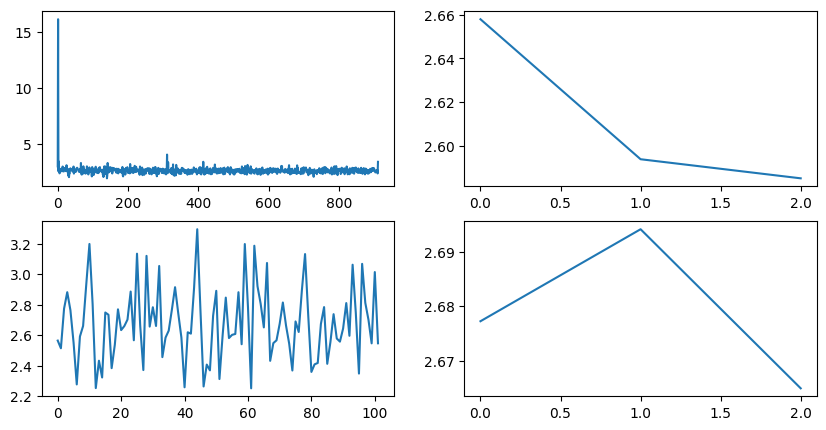

In [243]:
#version one : two epochs, freezed backbone
print("                  step_losses                             epoch_losses             ")
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
axes[0][0].plot(train_step_losses)
axes[0][1].plot(train_epoch_losses)
axes[1][0].plot(test_step_losses)
axes[1][1].plot(test_epoch_losses)

                  step_losses                             epoch_losses             


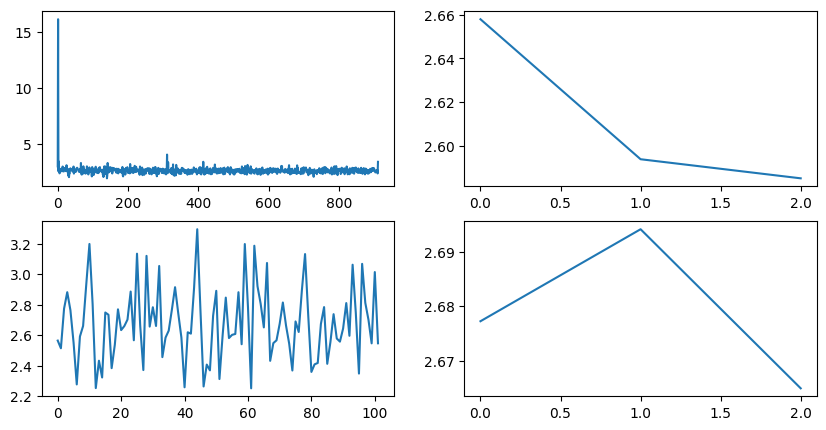

In [244]:
#version two : added - one epochs, freezed backbone
print("                  step_losses                             epoch_losses             ")
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
axes[0][0].plot(train_step_losses)
axes[0][1].plot(train_epoch_losses)
axes[1][0].plot(test_step_losses)
axes[1][1].plot(test_epoch_losses)

                  step_losses                             epoch_losses             


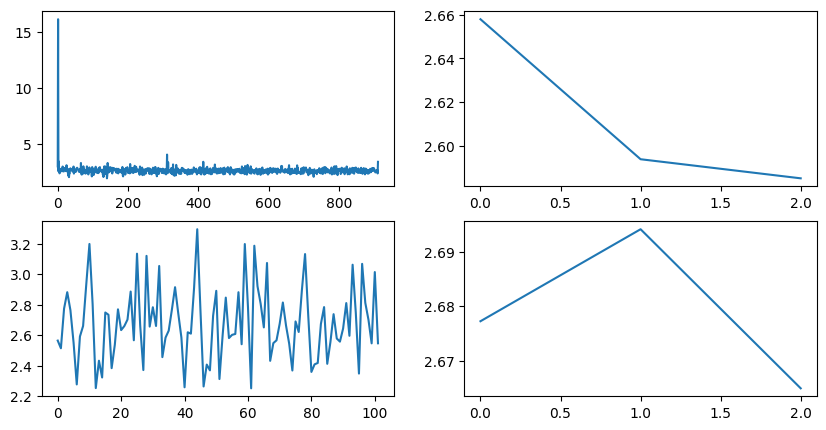

In [245]:
#version three : Added three epochs, unfreezed (backbone + head)
print("                  step_losses                             epoch_losses             ")
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
axes[0][0].plot(train_step_losses)
axes[0][1].plot(train_epoch_losses)
axes[1][0].plot(test_step_losses)
axes[1][1].plot(test_epoch_losses)

In [246]:
optimization(5)

Epoch number: 0
train
0.17280063033103943 0.0625
0.15949700772762299 0.1875
0.158627878342356 0.19940476190476192
0.16003052073140298 0.1875
0.16057132802358487 0.1798780487804878
0.16220185949521906 0.17279411764705882
0.1626548957629282 0.17725409836065573
0.16241832937992795 0.18397887323943662
0.16176328210183133 0.18518518518518517
0.16152338830979315 0.18818681318681318
0.16132645279464156 0.19121287128712872
0.16152046620845795 0.19087837837837837
0.1615303615646914 0.19369834710743802
0.16187272795284066 0.19036259541984732
0.16173432439777022 0.19148936170212766
0.16177904625602116 0.18874172185430463
0.16177659088410207 0.19138198757763975
0.16126809029551278 0.19371345029239767
0.16143246596030766 0.19371546961325967
0.16138359857479315 0.19077225130890052
0.16149124955359975 0.19154228855721392
0.16139136622019853 0.1898696682464455
0.1614620568256033 0.19061085972850678
0.16137066141609505 0.19101731601731603
0.1613375491992072 0.19035269709543567
0.1614102625633141 0.1889

                  step_losses                             epoch_losses             


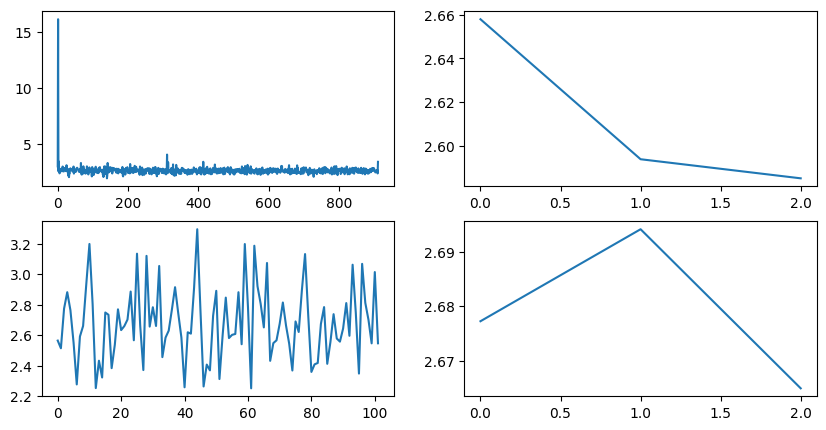

In [247]:
#version four : Added five epochs(total eight), unfreezed (backbone + head)
print("                  step_losses                             epoch_losses             ")
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
axes[0][0].plot(train_step_losses)
axes[0][1].plot(train_epoch_losses)
axes[1][0].plot(test_step_losses)
axes[1][1].plot(test_epoch_losses)

In [248]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

In [249]:
optimization(2)

Epoch number: 0
train
0.18182943761348724 0.1875
0.18178237839178604 0.13068181818181818
0.1758095451763698 0.16964285714285715
0.17318990297855869 0.17338709677419356
0.17324242468287304 0.16310975609756098
0.1703460835943035 0.17769607843137256
0.16915582095990417 0.18545081967213115
0.16889438494830064 0.18045774647887325
0.1677003515723311 0.18441358024691357
0.1667796288217817 0.18543956043956045
0.16623766425222453 0.18254950495049505
0.16562936099262926 0.18299549549549549
0.16507802866707164 0.18801652892561985
0.1640517514853077 0.1946564885496183
0.1645343909238247 0.19148936170212766
0.16462545047532642 0.18915562913907286
0.16413014914308274 0.18982919254658384
0.1641707354121738 0.1878654970760234
0.16376632534337965 0.1875
0.16375551259642496 0.18651832460732984
0.1633921718567758 0.18781094527363185
0.16342887451863403 0.1854265402843602
0.16339147758429945 0.18438914027149322
0.1634987922973963 0.18208874458874458
0.16326362358336627 0.18023858921161826
0.16292501327051

                  step_losses                             epoch_losses             


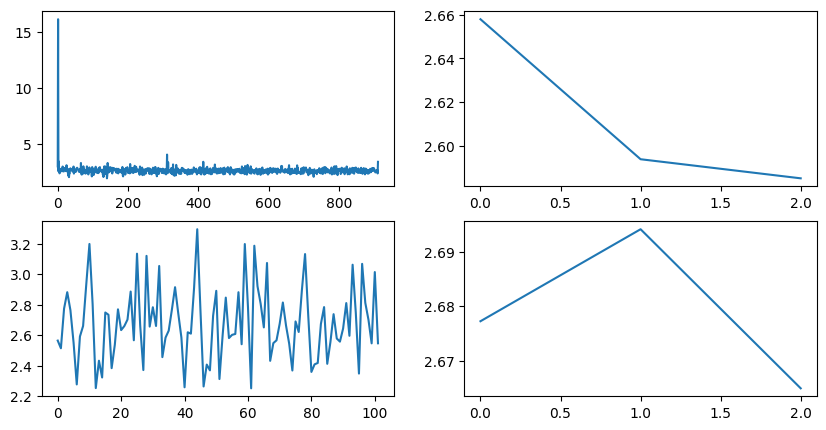

In [250]:
#version five : Added two epochs(total 10), unfreezed (backbone + head), optimizer = SGD, lr = 0.1, mom = 0.9
print("                  step_losses                             epoch_losses             ")
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
axes[0][0].plot(train_step_losses)
axes[0][1].plot(train_epoch_losses)
axes[1][0].plot(test_step_losses)
axes[1][1].plot(test_epoch_losses)

In [251]:
for param in model.parameters():
    param.requires_grad = False
    
    
for param in model.avgpool.parameters():
    param.requires_grad = True
    
for param in model.classifier.parameters():
    param.requires_grad = True

    

In [252]:
for name, param in model.named_parameters():
    print('Name: ', name,  'Requires_Grad: ', param.requires_grad)

Name:  features.0.weight Requires_Grad:  False
Name:  features.0.bias Requires_Grad:  False
Name:  features.2.weight Requires_Grad:  False
Name:  features.2.bias Requires_Grad:  False
Name:  features.5.weight Requires_Grad:  False
Name:  features.5.bias Requires_Grad:  False
Name:  features.7.weight Requires_Grad:  False
Name:  features.7.bias Requires_Grad:  False
Name:  features.10.weight Requires_Grad:  False
Name:  features.10.bias Requires_Grad:  False
Name:  features.12.weight Requires_Grad:  False
Name:  features.12.bias Requires_Grad:  False
Name:  features.14.weight Requires_Grad:  False
Name:  features.14.bias Requires_Grad:  False
Name:  features.17.weight Requires_Grad:  False
Name:  features.17.bias Requires_Grad:  False
Name:  features.19.weight Requires_Grad:  False
Name:  features.19.bias Requires_Grad:  False
Name:  features.21.weight Requires_Grad:  False
Name:  features.21.bias Requires_Grad:  False
Name:  features.24.weight Requires_Grad:  False
Name:  features.24.b

In [253]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
optimization(5)

Epoch number: 0
train
0.16633641719818115 0.125
0.15793606367978183 0.19886363636363635
0.1602246222041902 0.19642857142857142
0.1600038106403043 0.20967741935483872
0.16103041680847727 0.19969512195121952
0.1597873968820946 0.21200980392156862
0.160167928113312 0.20799180327868852
0.16003849262922581 0.2068661971830986
0.16111050527772786 0.19984567901234568
0.16164534629046262 0.20123626373626374
0.16181514699860375 0.2004950495049505
0.16194760114760012 0.19538288288288289
0.16178803022735375 0.19576446280991736
0.16137099095428262 0.1946564885496183
0.16159389849672925 0.19104609929078015
0.1615214686322686 0.19081125827814568
0.16131503370978076 0.1921583850931677
0.16165138127511008 0.18859649122807018
0.16153421380572555 0.1902624309392265
0.16160971503607266 0.19142670157068062
0.16153745115989476 0.18936567164179105
0.16145760922635335 0.18838862559241706
0.16132205272961525 0.18919683257918551
0.161449551775858 0.19047619047619047
0.16155094520432325 0.19061203319502074
0.161

                  step_losses                             epoch_losses             


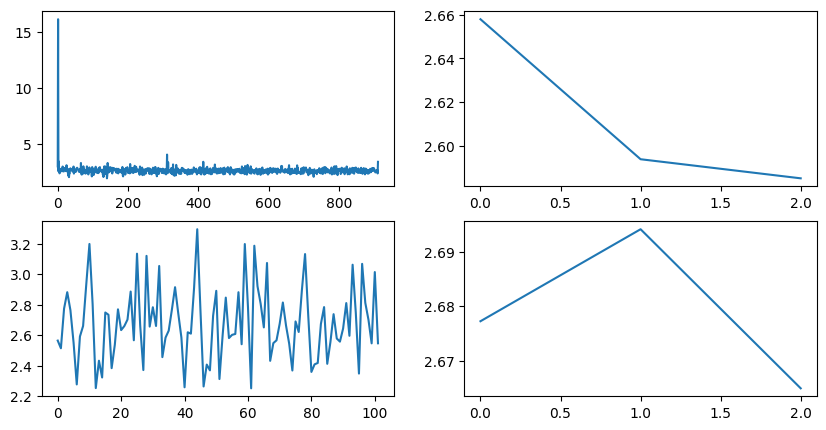

In [254]:
#version six : freez the body again - 5pochs
print("                  step_losses                             epoch_losses             ")
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
axes[0][0].plot(train_step_losses)
axes[0][1].plot(train_epoch_losses)
axes[1][0].plot(test_step_losses)
axes[1][1].plot(test_epoch_losses)

In [255]:
model = torchvision.models.vgg16(pretrained=True)

In [256]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [257]:
model = model.cuda()
optimization(10)

Epoch number: 0
train
1.3133310079574585 0.0
1.2376402074640447 0.0
1.229307696932838 0.0
1.2353729932538924 0.0


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/pyth

1.2258360560347394 0.0
1.2292251680411546 0.0
1.225843916173841 0.0010245901639344263
1.236287363817994 0.0008802816901408451
1.2331843523331631 0.0015432098765432098
1.2313845288622511 0.0013736263736263737
1.2342421371157806 0.0012376237623762376
1.2358065671748943 0.0011261261261261261
1.2341843636567928 0.0010330578512396695
1.2327694183087532 0.0009541984732824427
1.2320681057923228 0.0008865248226950354
1.2346971887626395 0.0008278145695364238
1.2359018444274523 0.0007763975155279503
1.2333495024352046 0.0007309941520467836
1.2316269709919039 0.0006906077348066298
1.2304057001443434 0.0006544502617801048
1.233540849306097 0.0006218905472636816
1.2344332504046471 0.0005924170616113745
1.234546076658085 0.0005656108597285068
1.2336480999405766 0.0005411255411255411
1.2353208564623757 0.0005186721991701245
1.2348479488456392 0.00049800796812749
1.2369228779584511 0.0004789272030651341
1.2378167415457018 0.00046125461254612545
1.2390057455178258 0.00044483985765124553
1.2401327730454

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/pyth

1.248182029258914 0.0
1.2489967907176298 0.0
1.2433937240819462 0.0
1.2448550815313635 0.0
1.2405522016831387 0.0
1.2425041513128594 0.0
1.242031152885739 0.0
1.2390345818287618 0.0
1.2382238994945178 0.0005165289256198347
1.23622544667193 0.00047709923664122136
1.2367953662331224 0.0004432624113475177
1.2386915107436527 0.0004139072847682119
1.2398920081417013 0.00038819875776397513
1.239104321825574 0.0003654970760233918
1.236723959116646 0.0003453038674033149
1.2353255193270938 0.0003272251308900524
1.2371316228933003 0.0003109452736318408
1.2349748170771304 0.0002962085308056872
1.234487426766443 0.0002828054298642534
1.2377163713628596 0.00027056277056277056
1.2373620039199893 0.00025933609958506224
1.2379989296316625 0.000249003984063745
1.2387535731911203 0.00023946360153256704
1.239026078438847 0.00023062730627306272
1.2388735636273314 0.00022241992882562276
1.2376307195814205 0.0002147766323024055
1.2393631756899761 0.00020764119601328904
test
1.1356357336044312 0.0
1.09389579

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
Exception ignored in:   File "/home/duongbinh/Projects/Sho

1.1031346474924395 0.004032258064516129
Epoch number: 2
train
1.1776925325393677 0.0
1.2642224810340188 0.0


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/pyth

1.2445584422066098 0.0
1.2342990252279467 0.0
1.2449467385687478 0.0
1.2516445225360346 0.0
1.2503363812556032 0.0
1.2468143567233019 0.0
1.2471482503561326 0.0
1.2443720534607605 0.0
1.2438403131938216 0.0
1.242940939224518 0.0
1.2466579380114216 0.0
1.2450332869100207 0.0
1.2429766824059452 0.0
1.2434672961961355 0.0
1.2449454039520358 0.0
1.2438938356282419 0.0
1.2444855241485722 0.0
1.2419747185956744 0.0
1.2426330393819667 0.0
1.241805268407433 0.0
1.2425446955326995 0.0
1.2413162147843992 0.0
1.2426353500097125 0.0
1.2401847611385513 0.0
1.2394747729502418 0.0
1.2394983047048984 0.0
1.2405957267801957 0.0
1.2394361139572774 0.0
1.240023782482971 0.0
test
1.1356357336044312 0.0
1.0938957983797246 0.005681818181818182


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/pyth

1.1195451276642936 0.002976190476190476
1.1031346474924395 0.004032258064516129
Epoch number: 3
train
1.388340711593628 0.0
1.1862210035324097 0.0


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/pyth

1.2110477742694674 0.0
1.214019863836227 0.0
1.2322055770129692 0.0
1.2331470975688859 0.0
1.2410264953238066 0.0
1.2443362541601692 0.0
1.2485921368186856 0.0
1.2472877410741954 0.0
1.2455682353218003 0.0
1.2443329997964807 0.0
1.247555429285223 0.0
1.2453502999007247 0.0
1.2427417910690848 0.0
1.2484922132744694 0.0
1.2470407389705966 0.0
1.2482206988752933 0.0
1.2474346865606571 0.0003453038674033149
1.2460062141817903 0.0003272251308900524
1.2451465823757115 0.0003109452736318408
1.244661311967678 0.0002962085308056872
1.2428735295032485 0.0002828054298642534
1.2419670242251772 0.00027056277056277056
1.2419127918377952 0.00025933609958506224
1.2434804548780283 0.000249003984063745
1.2415542282820662 0.00023946360153256704
1.2401450458927787 0.00023062730627306272
1.239475131034851 0.00022241992882562276
1.2391083168819599 0.0002147766323024055
1.2384823776558784 0.00020764119601328904
test
1.1356357336044312 0.0
1.0938957983797246 0.005681818181818182


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>AssertionError
: can only test a child processTraceback (most recent call last):

  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
Exception ignored in:     <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d

1.1195451276642936 0.002976190476190476
1.1031346474924395 0.004032258064516129
Epoch number: 4
train
1.2509056329727173 0.0
1.2455398386174983 0.0


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/pyth

1.2494383653004963 0.002976190476190476
1.2517843150323438 0.0020161290322580645
1.2517347931861877 0.001524390243902439
1.2476479621494518 0.0012254901960784314
1.2470689083709092 0.0010245901639344263
1.2475738298725074 0.0008802816901408451
1.2433569615269884 0.0007716049382716049
1.2347685812593816 0.0006868131868131869
1.2372221126414762 0.0006188118811881188
1.2357567371548832 0.0005630630630630631
1.233076945316693 0.0005165289256198347
1.237236937038771 0.00047709923664122136
1.237300398079216 0.0004432624113475177
1.2365259133427349 0.0004139072847682119
1.2381275081486436 0.00038819875776397513
1.238874071871328 0.0003654970760233918
1.239231424766351 0.0003453038674033149
1.241317153289056 0.0003272251308900524
1.2406534671190366 0.0003109452736318408
1.241096317768097 0.0002962085308056872
1.242562963142654 0.0002828054298642534
1.2428028219706053 0.00027056277056277056
1.2435239016762414 0.00025933609958506224
1.2438528160175004 0.000249003984063745
1.2445899944652543 0.00

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>


1.1356357336044312 0.0


Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    

1.0938957983797246 0.005681818181818182
1.1195451276642936 0.002976190476190476
1.1031346474924395 0.004032258064516129
Epoch number: 5
train


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/pyth

1.297572374343872 0.0


    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child proces

1.2647707570682873 0.0
1.260150330407279 0.0
1.246359117569462 0.0
1.234756152804305 0.0
1.2406577409482469 0.0
1.2384733000739676 0.0
1.2403842193979613 0.0
1.2423641475630396 0.0
1.2424617416256076 0.0
1.2430652521624423 0.0
1.2422622914786812 0.0
1.237625108277502 0.0
1.2388760370152596 0.0
1.2412566056488255 0.0
1.2396300920587502 0.0
1.2392804141370406 0.0
1.2400909543734544 0.0
1.2419968817115488 0.0
1.2437470134016106 0.0
1.241878225435665 0.0
1.245359237725136 0.0
1.2497936557320988 0.0
1.2491649141559353 0.0
1.2473204056751679 0.0
1.2476418179819784 0.0
1.2465274589728579 0.0
1.2460212808693467 0.0
1.2467012341760655 0.0
1.245511805068996 0.0002147766323024055
1.2449753288414787 0.00020764119601328904
test


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/pyth

1.1356357336044312 0.0


  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only t

1.0938957983797246 0.005681818181818182
1.1195451276642936 0.002976190476190476
1.1031346474924395 0.004032258064516129
Epoch number: 6
train


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/pyth

1.2887187004089355 0.0
1.2559732848947698 0.0
1.2562803767976307 0.0
1.2495590832925612 0.0
1.257286400329776 0.0
1.2613415694704242 0.0
1.2582171451850015 0.0
1.2581184380491015 0.0
1.2506734574282612 0.0
1.246828244282649 0.0
1.244768502688644 0.0
1.2415136216997027 0.0
1.239614649252458 0.0
1.2385170350547965 0.0
1.2373643606267077 0.0
1.2370339363616034 0.0
1.2414706338266408 0.0
1.2424444594578437 0.0003654970760233918
1.239935845301296 0.0003453038674033149
1.2402489734569768 0.0006544502617801048
1.2405408798758664 0.0006218905472636816
1.2403148633043912 0.0005924170616113745
1.2405434722814086 0.0005656108597285068
1.2389573039430561 0.0005411255411255411
1.2396671049822416 0.0005186721991701245
1.2406691322288665 0.00049800796812749
1.2425118579718344 0.0004789272030651341
1.2411804036460679 0.00046125461254612545
1.2413073667852055 0.00044483985765124553
1.2399078978295999 0.000429553264604811
1.2409025543551904 0.0004152823920265781
test


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/pyth

1.1356357336044312 0.0


    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child proces

1.0938957983797246 0.005681818181818182
1.1195451276642936 0.002976190476190476
1.1031346474924395 0.004032258064516129
Epoch number: 7
train


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/pyth

1.2248916625976562 0.0
1.2357662157578901 0.0
1.2230587630044847 0.0
1.2236457140214982 0.0
1.2301491469871708 0.0
1.232394583085004 0.0
1.2422893496810412 0.0
1.2391469562557382 0.0
1.233671083862399 0.0
1.239336874458816 0.0
1.2354719202117164 0.0
1.2416336278657656 0.0
1.2443134045797932 0.0
1.2437095924188162 0.0
1.2436091367234574 0.0
1.2422130423665836 0.0
1.2397071019462917 0.0
1.240926604521902 0.0
1.2391195936097625 0.0
1.2405733637784788 0.0
1.242237690669387 0.0
1.2435093790433982 0.0
1.2437183792235085 0.0
1.245291102500189 0.0
1.2457612258270074 0.0
1.2462178264481139 0.0
1.2447384280719975 0.0
1.2438595418120661 0.0
1.2442945861307328 0.0
1.245314427667467 0.0
1.2429408900365482 0.0
test


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/pyth

1.1356357336044312 0.0
1.0938957983797246 0.005681818181818182
1.1195451276642936 0.002976190476190476
1.1031346474924395 0.004032258064516129
Epoch number: 8
train


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/pyth

1.2969300746917725 0.0
1.2375603047284214 0.0
1.267455742472694 0.0
1.2618921687526088 0.0
1.2532591906989492 0.0
1.25413604109895 0.0
1.2474135551296297 0.0
1.246982107699757 0.0
1.2458080833340868 0.0
1.245161976133074 0.0
1.2459632394337419 0.0
1.245708443023063 0.0
1.2439915582168202 0.0
1.2455671497883687 0.0
1.248749444670711 0.0
1.24960056914399 0.0
1.252181525556197 0.0
1.2504189112033064 0.0
1.2504202265765785 0.0
1.2489828064803679 0.0
1.245083072885352 0.0
1.2432543587345648 0.0
1.2422909720451045 0.0
1.2439199985363782 0.0
1.2445666038149126 0.0
1.2438582614123583 0.0
1.242852473167624 0.0
1.242475145417386 0.0
1.2424140400733812 0.0
1.2418809031293154 0.0
1.2411534318892268 0.0
test


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/pyth

1.1356357336044312 0.0


    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):

1.0938957983797246 0.005681818181818182
1.1195451276642936 0.002976190476190476
1.1031346474924395 0.004032258064516129
Epoch number: 9
train


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/pyth

1.2920827865600586 0.0



AssertionError: can only test a child process


1.2426183332096448 0.0
1.2510534581683932 0.0
1.2569541661970076 0.0
1.2608801620762522 0.0
1.2593935400831933 0.0
1.2574980317569169 0.0
1.2557878275992165 0.0
1.2604787320266535 0.0
1.2601501994080595 0.0
1.2554524995312832 0.0
1.2563791543513805 0.0
1.257958007252906 0.0
1.25133846279319 0.0
1.2483116362957245 0.0
1.2439486443601697 0.0
1.245402002926939 0.0
1.2439105176089102 0.0
1.2442087962482515 0.0
1.2440851390049719 0.0
1.2437568564913166 0.0
1.2426254867942412 0.0
1.2401794119657974 0.0002828054298642534
1.2398590840302504 0.00027056277056277056
1.2388803004229216 0.00025933609958506224
1.239705808134193 0.00049800796812749
1.2394369735571615 0.0004789272030651341
1.238698407292806 0.00046125461254612545
1.2391966059538817 0.00044483985765124553
1.2397696455729377 0.000429553264604811
1.2383985250099157 0.0004152823920265781
test


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/pyth

1.1356357336044312 0.0


assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4580d35cf0>
Traceback (most recent call last):
  File "/home/duongbinh/Projects/ShoPredict/.venv/lib/python3.10/site-packages/torch/utils/data/dataloa

1.0938957983797246 0.005681818181818182
1.1195451276642936 0.002976190476190476
1.1031346474924395 0.004032258064516129


                  step_losses                             epoch_losses             


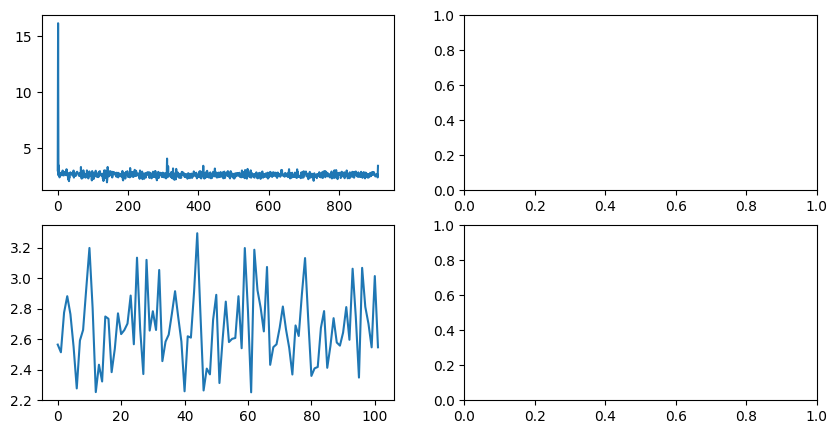

In [258]:
#version six : weights of vgg16, freez the body, 10pochs
print("                  step_losses                             epoch_losses             ")
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
axes[0][0].plot(train_step_losses)
axes[1][0].plot(test_step_losses)

In [259]:
model_path = "./Vgg16_body_freezed_10_epochs.pth"
torch.save(model.state_dict(), model_path)

In [260]:
# Download file
from IPython.display import FileLink 
FileLink(r'./Vgg16_body_freezed_10_epochs.pth')

/home/duongbinh/Projects/ShoPredict/clothes_classifier/src/Vgg16_body_freezed_10_epochs.pth